Natural frequencies:  [2.17409695 0.58254752]
Mode shapes:  [[ 0.9390708   0.59069049]
 [-0.34372377  0.80689822]]


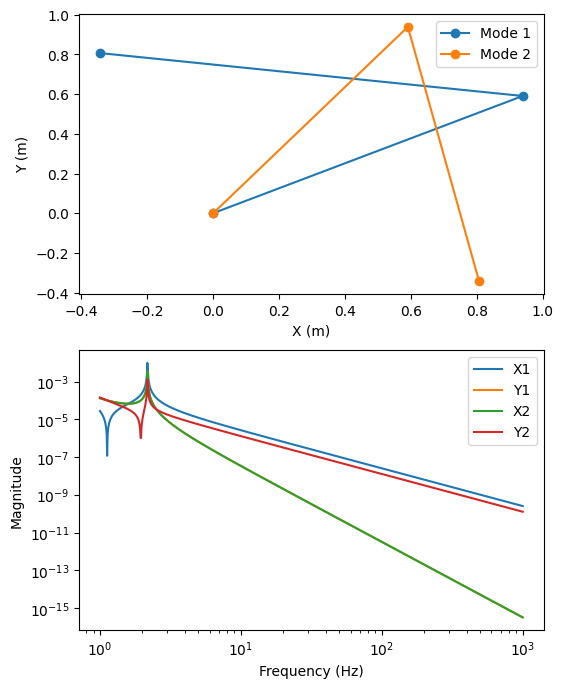

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define system parameters
m1 = 100  # kg
m2 = 200  # kg
k1 = 5000  # N/m
k2 = 10000  # N/m
c1 = 0  # Ns/m
c2 = 0  # Ns/m

# System matrices
M = np.array([[m1, 0], [0, m2]])
C = np.array([[c1+c2, -c2], [-c2, c2]])
K = np.array([[k1+k2, -k2], [-k2, k2]])

# Natural frequencies and mode shapes
eigvals, eigvecs = np.linalg.eig(np.dot(np.linalg.inv(M), K))
freqs = np.sqrt(eigvals) / (2 * np.pi)
modes = eigvecs

print("Natural frequencies: ", freqs)
print("Mode shapes: ", modes)

fig, ax = plt.subplots(2, 1, figsize=(6, 8))
x = np.array([0, modes[0, 0], modes[1, 0]])
y = np.array([0, modes[0, 1], modes[1, 1]])
ax[0].plot(x, y, 'o-', label='Mode 1')
x = np.array([0, modes[0, 1], modes[1, 1]])
y = np.array([0, modes[0, 0], modes[1, 0]])
ax[0].plot(x, y, 'o-', label='Mode 2')
ax[0].set_xlabel('X (m)')
ax[0].set_ylabel('Y (m)')
ax[0].legend()

f = np.logspace(0, 3, 1000)
w = 2 * np.pi * f
H = np.zeros((len(f), 2, 2), dtype=complex)
for i in range(len(f)):
    H[i] = np.linalg.inv(-w[i]**2 * M + 1j*w[i]*C + K)
ax[1].loglog(f, np.abs(H[:, 0, 0]), label='X1')
ax[1].loglog(f, np.abs(H[:, 1, 0]), label='Y1')
ax[1].loglog(f, np.abs(H[:, 0, 1]), label='X2')
ax[1].loglog(f, np.abs(H[:, 1, 1]), label='Y2')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].legend()

plt.show()